In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/theop\Documents/000AAA DATASCIENTIST/000 PROJET AUS\meteo_knn_imputer.csv')
X = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 16)

In [53]:
## Entrainement du modèle
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))
display(rf.score(X_test, y_test))
y_pred = rf.predict(X_test)

1.0

0.8600832177531207

In [54]:
## Initialisation et entrainement d'une ACP 
pca = PCA(n_components=2) ## deux composantes pour pouvoir la représenter graphiquement
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_new_train = pca.fit_transform(X_train_scaled) ## Transformation du jeu de données par l'ACP

X_test_scaled = scaler.fit_transform(X_test)
X_new_test = pca.fit_transform(X_test_scaled)

coeff = pca.components_.transpose() ## Récupération des coefficients d'ACP

print('Part de variance expliquée:', pca.explained_variance_ratio_)
print('Part de variance expliquée cumulative:', np.cumsum(pca.explained_variance_ratio_))

Part de variance expliquée: [0.06279439 0.04116045]
Part de variance expliquée cumulative: [0.06279439 0.10395484]


In [55]:
## Création d'un DataFrame avec les coefficients des composantes pour chaque feature
df_pca = pd.DataFrame(coeff, index = X_train.columns)
display(df_pca)

,0,1
MinTemp,0.290618,0.219102
MaxTemp,0.380731,0.014706
Rainfall,-0.048090,0.205287
Evaporation,0.272470,0.022020
Sunshine,0.221449,-0.232438
...,...,...
WindDir3pm_SSW,-0.037603,-0.017991
WindDir3pm_SW,-0.026791,-0.014905
WindDir3pm_W,-0.036284,0.059532
WindDir3pm_WNW,-0.001504,0.072677


In [56]:
## Mise en place d'un seuil pour garder les features avec un plus fort coefficient
df_pca2 = df_pca[(abs(df_pca[0]) + abs(df_pca[1])) > 0.2] 
df_pca2

,0,1
MinTemp,0.290618,0.219102
MaxTemp,0.380731,0.014706
Rainfall,-0.048090,0.205287
Evaporation,0.272470,0.022020
Sunshine,0.221449,-0.232438
WindGustSpeed,0.073474,0.295862
WindSpeed9am,0.077019,0.205198
WindSpeed3pm,0.059653,0.252130
Humidity9am,-0.278320,0.109324
Humidity3pm,-0.231655,0.241885


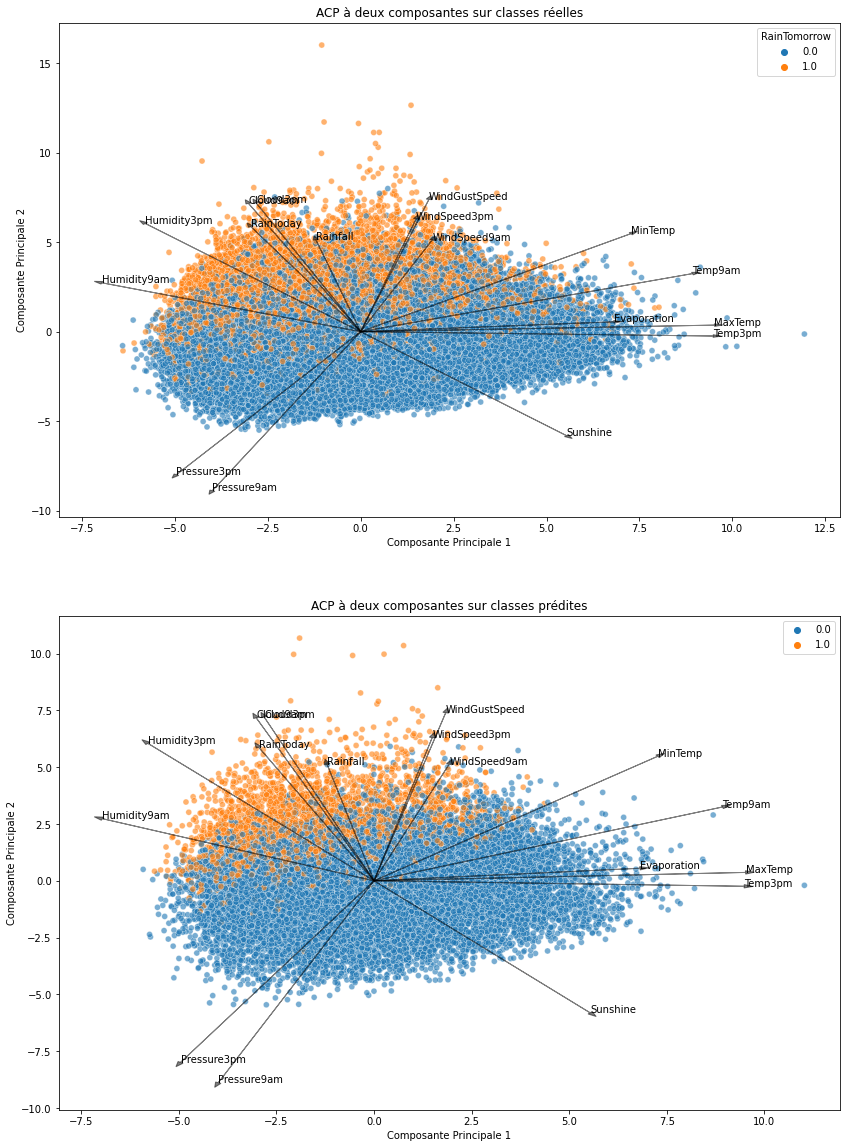

In [57]:
## Représentation graphique de l'ACP
plt.figure(figsize=(14, 20))
plt.subplot(211)
sns.scatterplot(x=X_new_train[:, 0], y=X_new_train[:, 1], hue= y_train, alpha=0.6) ## Nuage de points correspondant aux données

## Jeu de données d'entrainement
for index, row in df_pca2.iterrows(): ## Affichage de chaque feature avec les coordonnées x,y correspondant aux coefficients ACP des features
    plt.arrow(0, 0, row[0]*25, row[1]*25,
              color='k', alpha=0.5, head_width=0.15, )
    plt.text(row[0]*25, row[1]*25, index, color='k')
    plt.ylabel('Composante Principale 2')
    plt.xlabel('Composante Principale 1')
plt.title('ACP à deux composantes sur classes réelles')

## Jeu de données de prédiction
plt.subplot(212)
sns.scatterplot(x=X_new_test[:, 0], y=X_new_test[:, 1], hue= y_pred, alpha=0.6)
for index, row in df_pca2.iterrows():
    plt.arrow(0, 0, row[0]*25, row[1]*25,
              color='k', alpha=0.5, head_width=0.15, )
    plt.text(row[0]*25, row[1]*25, index, color='k')
    plt.ylabel('Composante Principale 2')
    plt.xlabel('Composante Principale 1')
plt.title('ACP à deux composantes sur classes prédites');

Part de variance expliquée cumulative:
 [0.06282183 0.10336661 0.13431837 0.15922674 0.18197979 0.20384977
 0.22357994 0.24147849 0.25904935 0.27531878 0.2905823  0.30512588
 0.31962458 0.33383587 0.34787052 0.36093013 0.37391544 0.38674177
 0.39939282 0.41190965 0.42422819 0.43644617 0.44844131 0.46037729
 0.47225239 0.48391278 0.49555645 0.5071187  0.51854264 0.52986847
 0.54110486 0.55228172 0.56343622 0.57448708 0.58551497 0.59652547
 0.60750016 0.61843029 0.62930586 0.64014999 0.65091957 0.66164475
 0.67236415 0.68302656 0.69359182 0.70405776 0.71447483 0.72475245
 0.73499437 0.74519976 0.75533409 0.76541525 0.77540095 0.7851148
 0.79476797 0.80431068 0.81381185 0.82310008 0.83233656 0.8414704
 0.85030846 0.85908353 0.86760727 0.87593502 0.88396112 0.89189293
 0.89963552 0.90699354 0.91423637 0.92130998 0.9282925  0.93496191
 0.94135115 0.9469278  0.95237097 0.95777708 0.962773   0.96740736
 0.97187031 0.97588202 0.97978415 0.98323984 0.98668746 0.98994244
 0.99305615 0.99549761 0

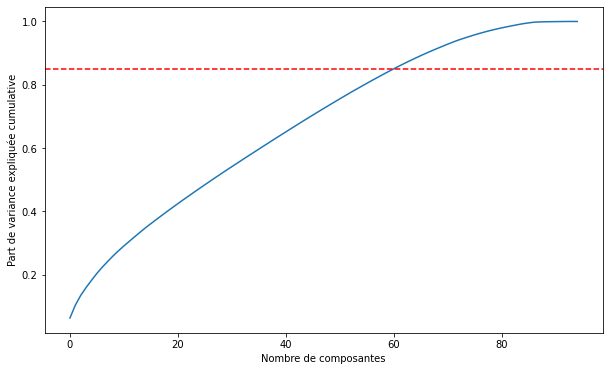

In [58]:
### Pour Illustration
pca2 = PCA() # ACP par défaut
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train)
X_new_train2 = pca2.fit_transform(X_train_scaled)

print('Part de variance expliquée cumulative:\n',np.cumsum(pca2.explained_variance_ratio_)) ## atteint 1.0 à la 94ème composante

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.ylabel('Part de variance expliquée cumulative')
plt.xlabel('Nombre de composantes')
plt.axhline(0.85, color = 'red', linestyle ='--'); # Seuil de 85% de variance expliquée atteint à la 61ème composante